In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('bank-full.csv')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#checking for null values
df.isnull().sum() #we don't have any missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# Encoding Target Variable(y)
df['y'] = df['y'].map({'yes':1, 'no': 0})

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [12]:
# Checking value counts of target variable
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

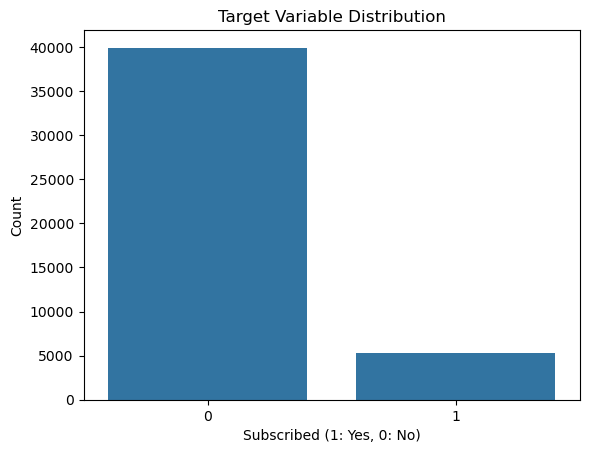

In [13]:
# Visualizing target variable
sns.barplot(x=df['y'].value_counts().index, y=df['y'].value_counts().values)
plt.xlabel('Subscribed (1: Yes, 0: No)')
plt.ylabel('Count')
plt.title('Target Variable Distribution')
plt.show()


In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
# Checking for categorical columns

categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [16]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

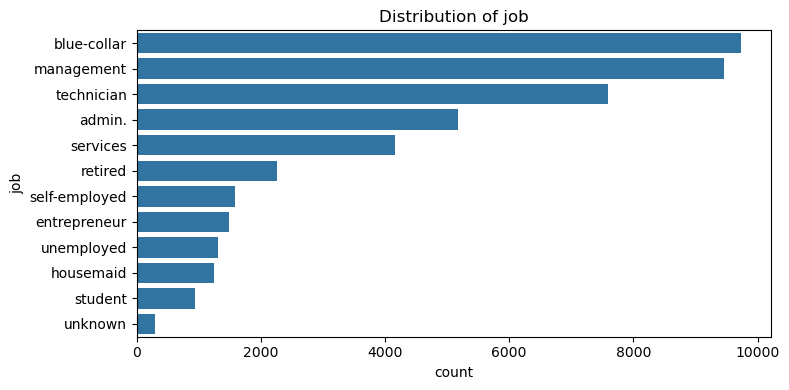

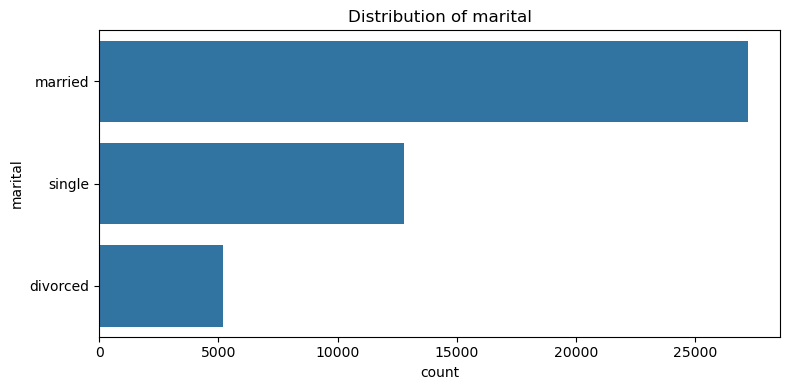

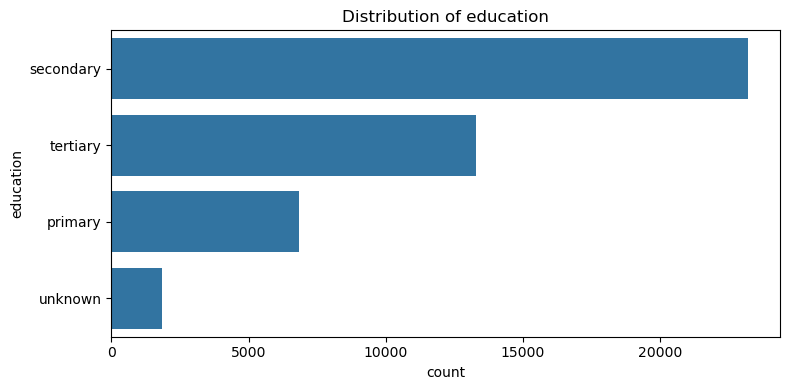

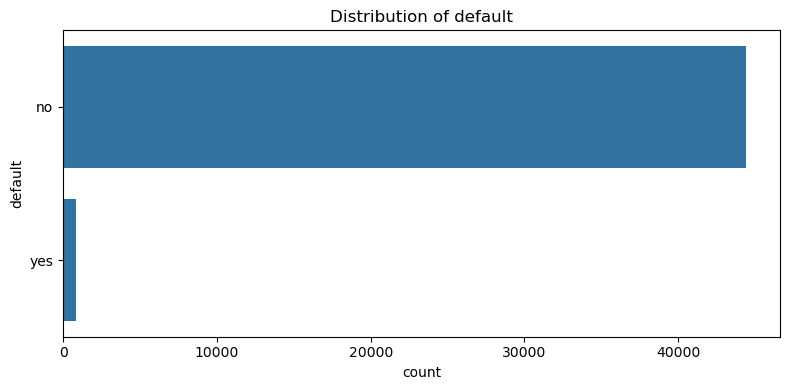

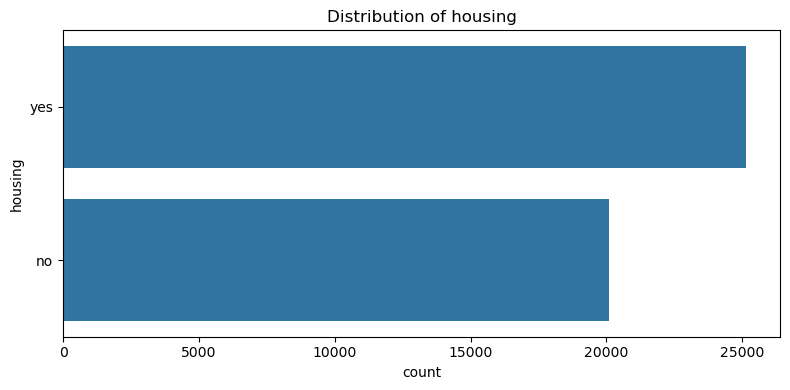

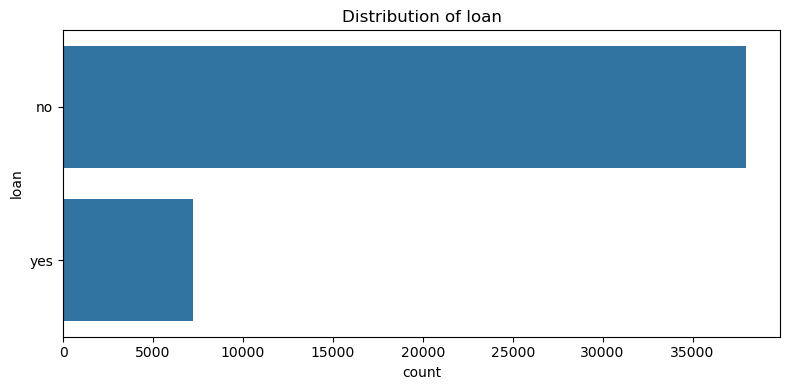

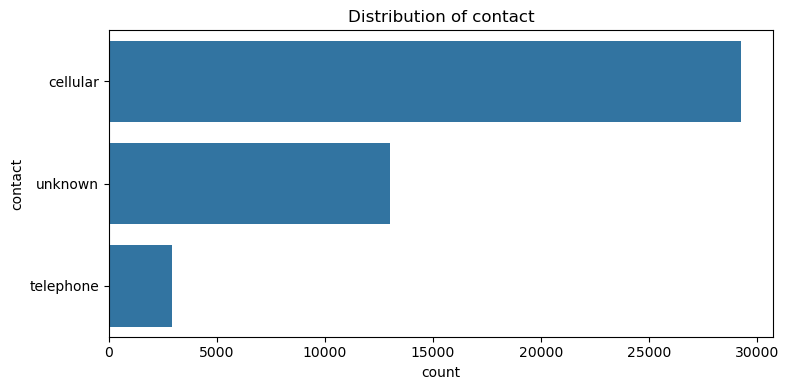

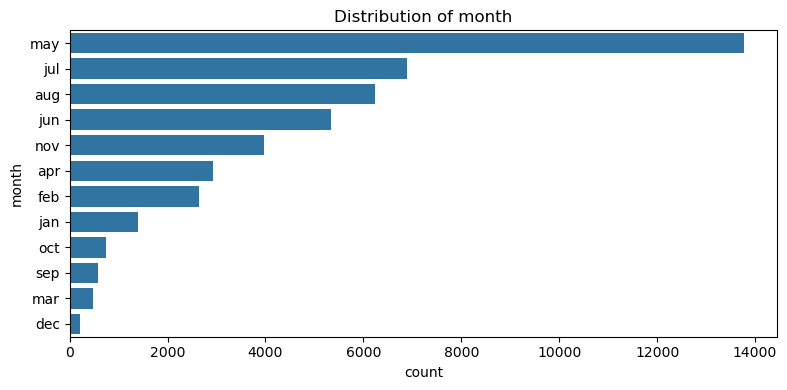

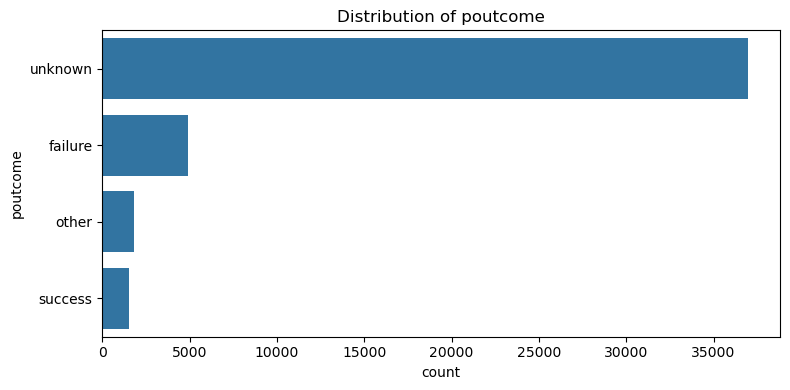

In [17]:
# Visualizing categorical columns
#sns.set(style='whitegrid')
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [18]:
# Encoding categorical columns
# using One-Hot encoding
df_caten = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

In [19]:
df_caten

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,1,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,0,True,False,...,False,False,False,False,True,False,False,False,False,True


In [20]:
#extra
#df_caten['month_aug'].dtype

In [21]:
#extra
#df_caten = df_caten.astype(int)
#df_caten['month_aug'].dtype


In [22]:
df_caten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_blue-collar      45211 non-null  bool 
 9   job_entrepreneur     45211 non-null  bool 
 10  job_housemaid        45211 non-null  bool 
 11  job_management       45211 non-null  bool 
 12  job_retired          45211 non-null  bool 
 13  job_self-employed    45211 non-null  bool 
 14  job_services         45211 non-null  bool 
 15  job_student          45211 non-null  bool 
 16  job_technician       4

In [23]:
#Identifying numerical columns (excluding Target Variable)

numerical_cols = df_caten.select_dtypes(include=['int64']).columns.tolist()
if 'y' in numerical_cols:
    numerical_cols.remove('y')

In [24]:
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

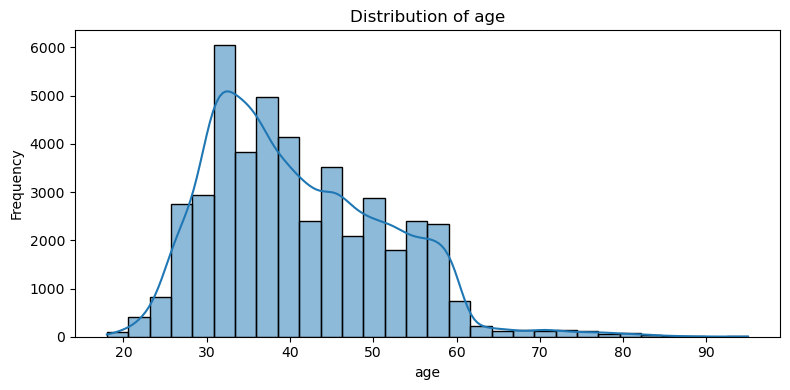

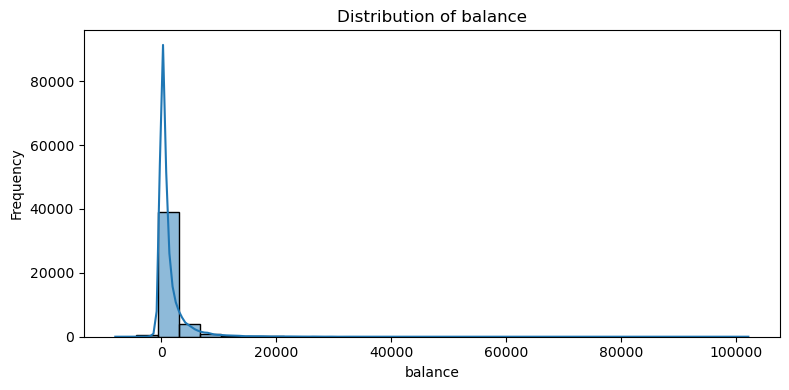

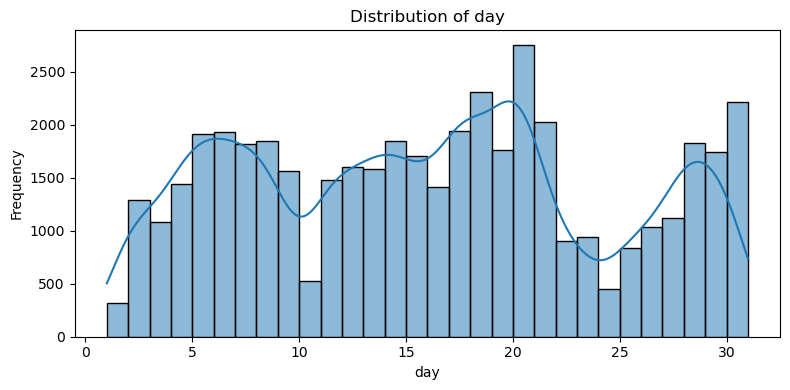

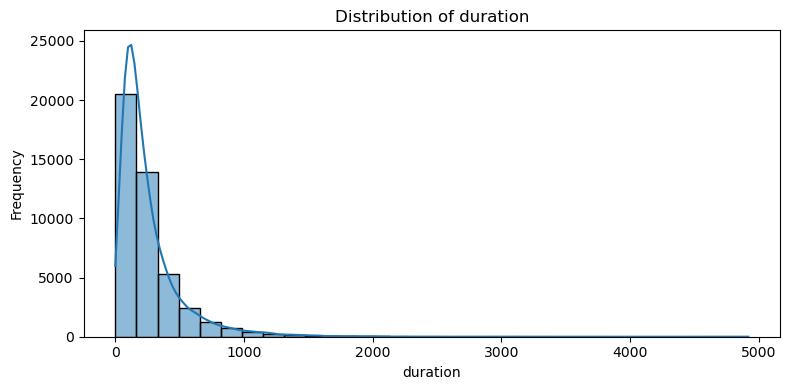

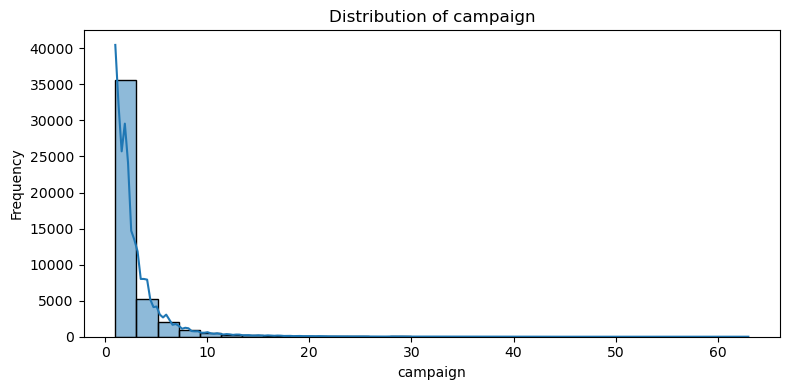

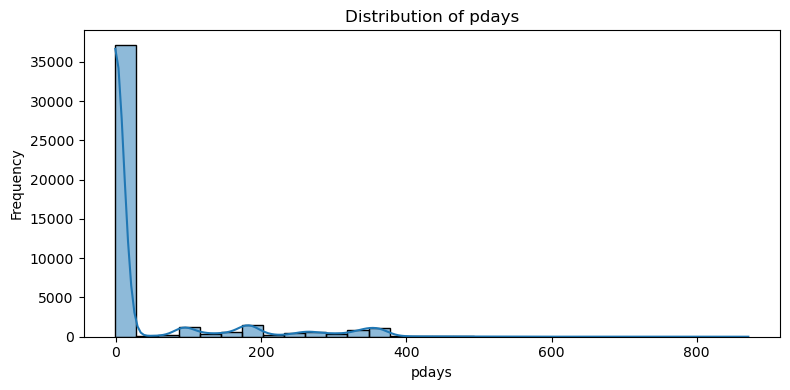

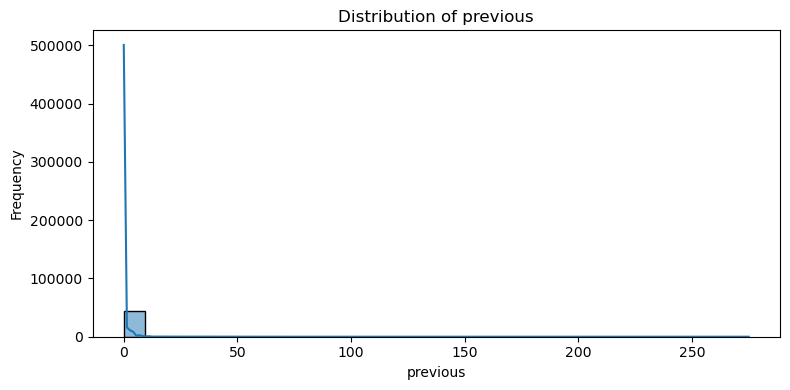

In [25]:
# Visualizing using Histogram

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_caten[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

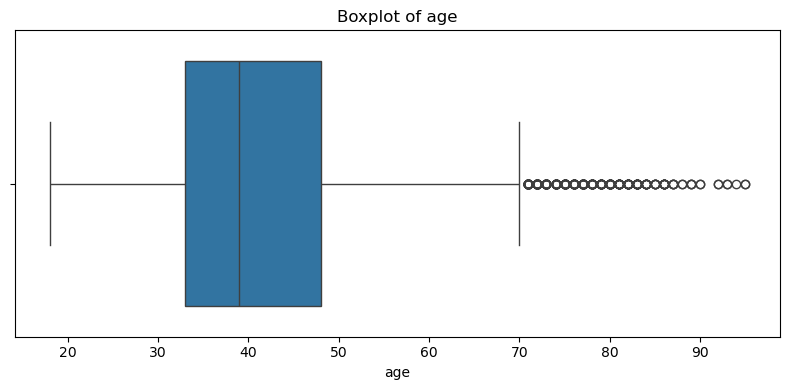

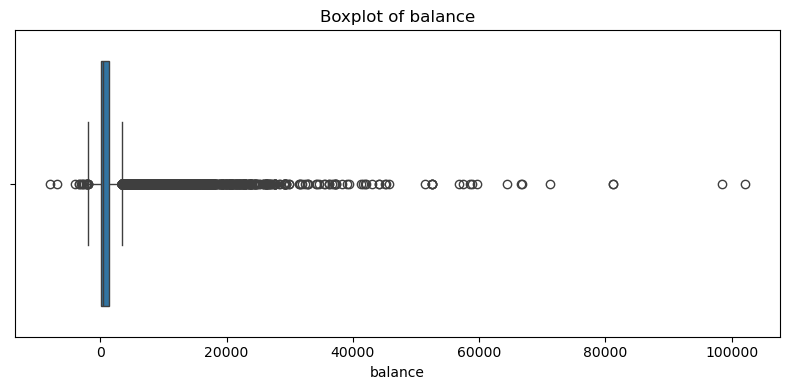

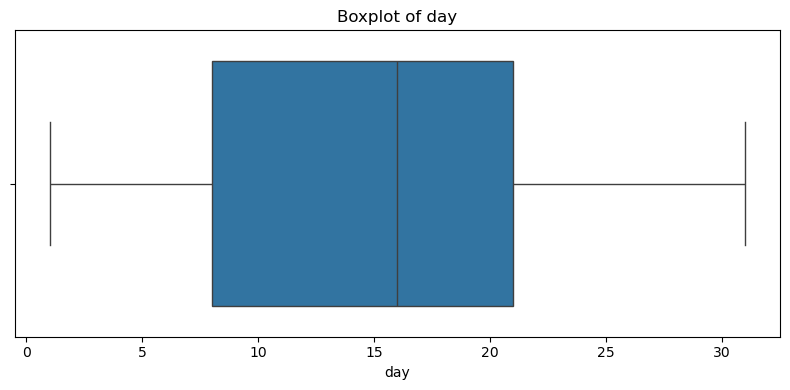

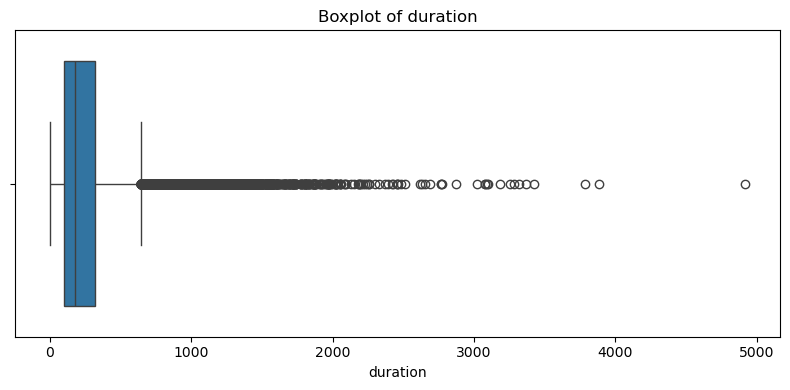

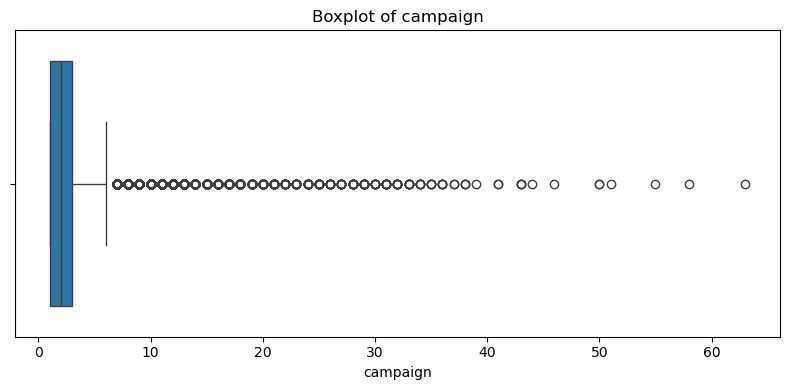

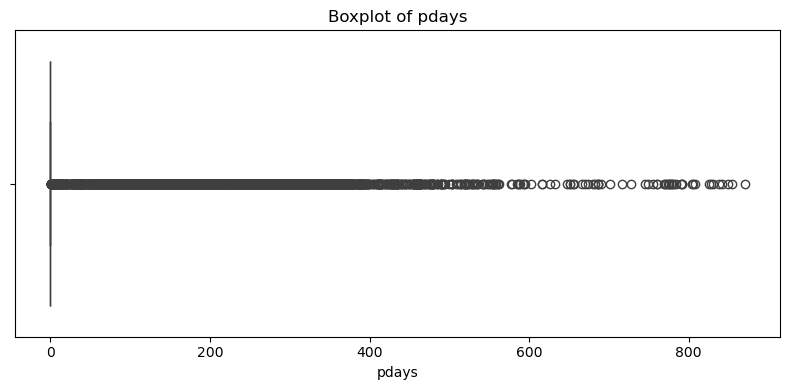

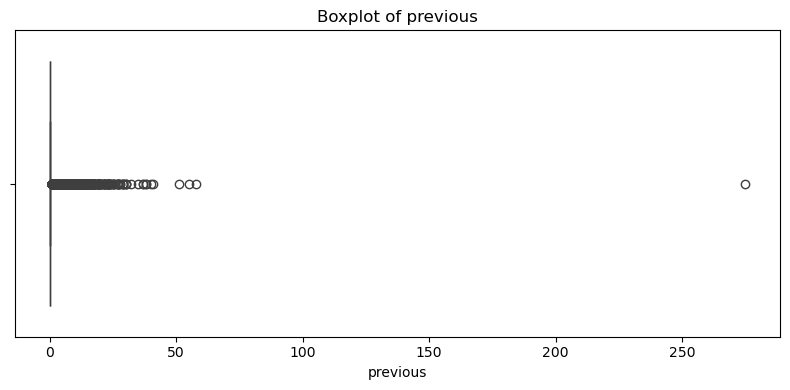

In [26]:
# Outlier Detection
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_caten[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
    

In [27]:
# Handling Outliers

# we will keep the outliers in the AGE column, as age of 90 is possible

# We will consider capping for the BALANCE column

# DAY column has no outliers

# Keep DURATION column as it is

# Capping for the CAMPAIGN column

# PDAYS is tricky, -1 is not a number. It is a code, so we will replace -1 

# PREVIOUS column need to be capped

outlier_cols = ['balance', 'campaign','previous']

for col in outlier_cols:
    Q1 = df_caten[col].quantile(0.25)
    Q3 = df_caten[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Applying capping
    df_caten[col] = np.where(df_caten[col] > upper_bound, upper_bound,
                            np.where(df_caten[col] < lower_bound, lower_bound, df_caten[col]))
    

In [28]:
print(df['pdays'].value_counts().sort_index())


pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Name: count, Length: 559, dtype: int64


In [29]:
# Special case : Pdays

df['was_previously_contacted'] = np.where(df['pdays'] == -1, 0, 1)
df['pdays'] = df['pdays'].replace(-1, np.nan)

#Imputing missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['pdays'] = imputer.fit_transform(df[['pdays']])


In [30]:
#have a doubt here, below.

In [31]:
# After handling pdays and was_previously_contacted...

# Identify categorical columns again
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode updated df
df_caten = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Update numerical columns
numerical_cols = df_caten.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'y' in numerical_cols:
    numerical_cols.remove('y')


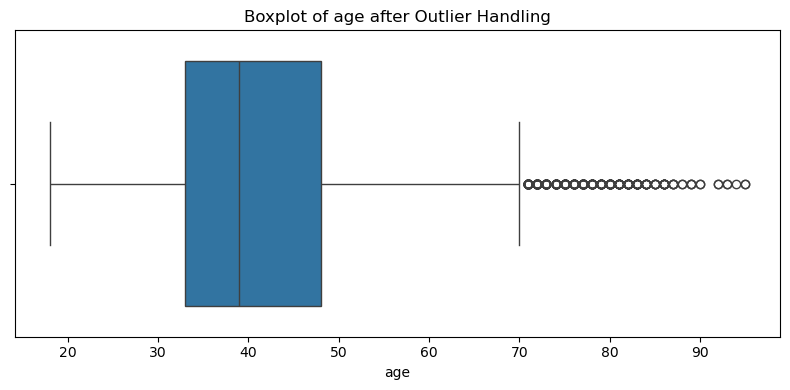

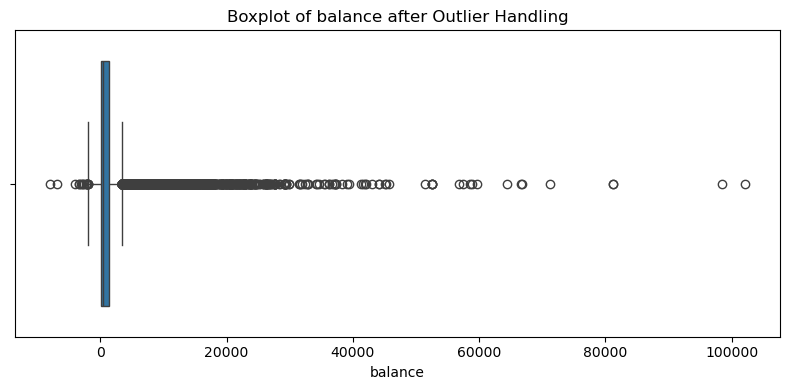

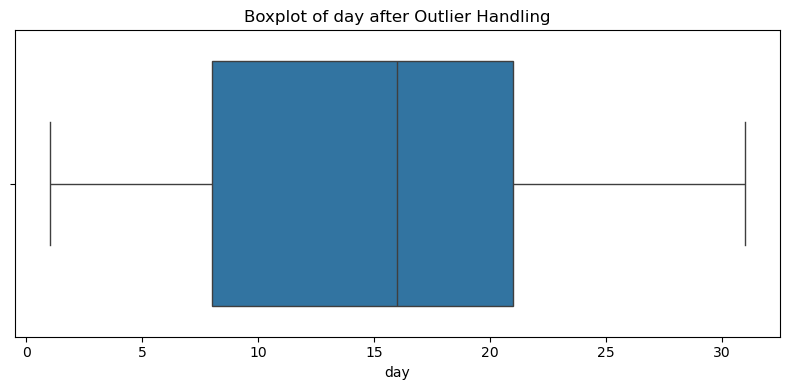

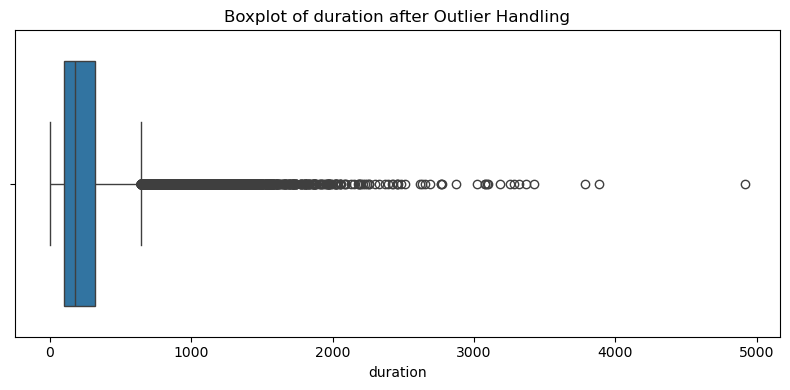

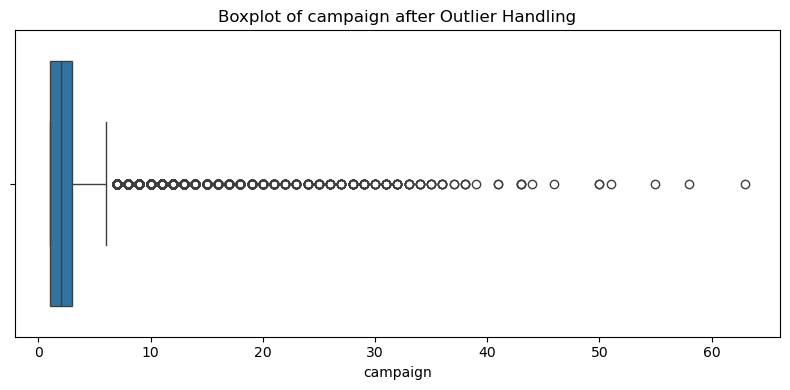

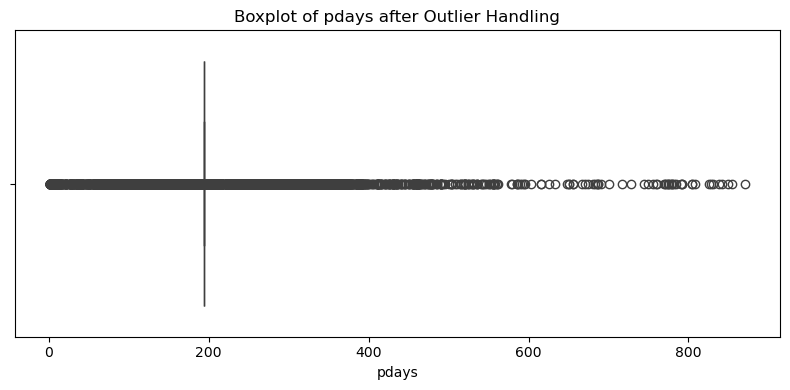

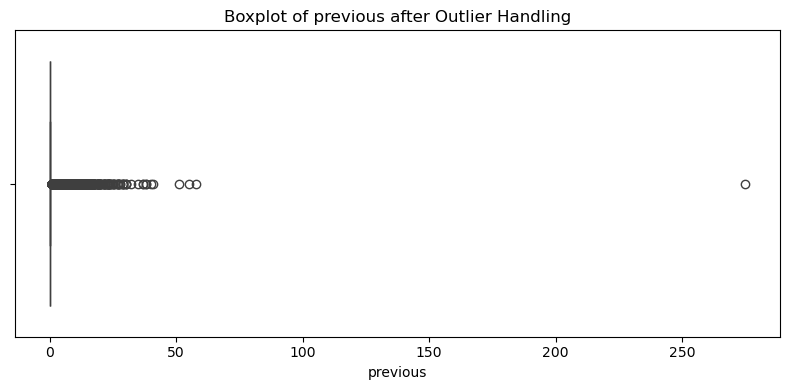

In [32]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_caten[col])
    plt.title(f'Boxplot of {col} after Outlier Handling')
    plt.tight_layout()
    plt.show()


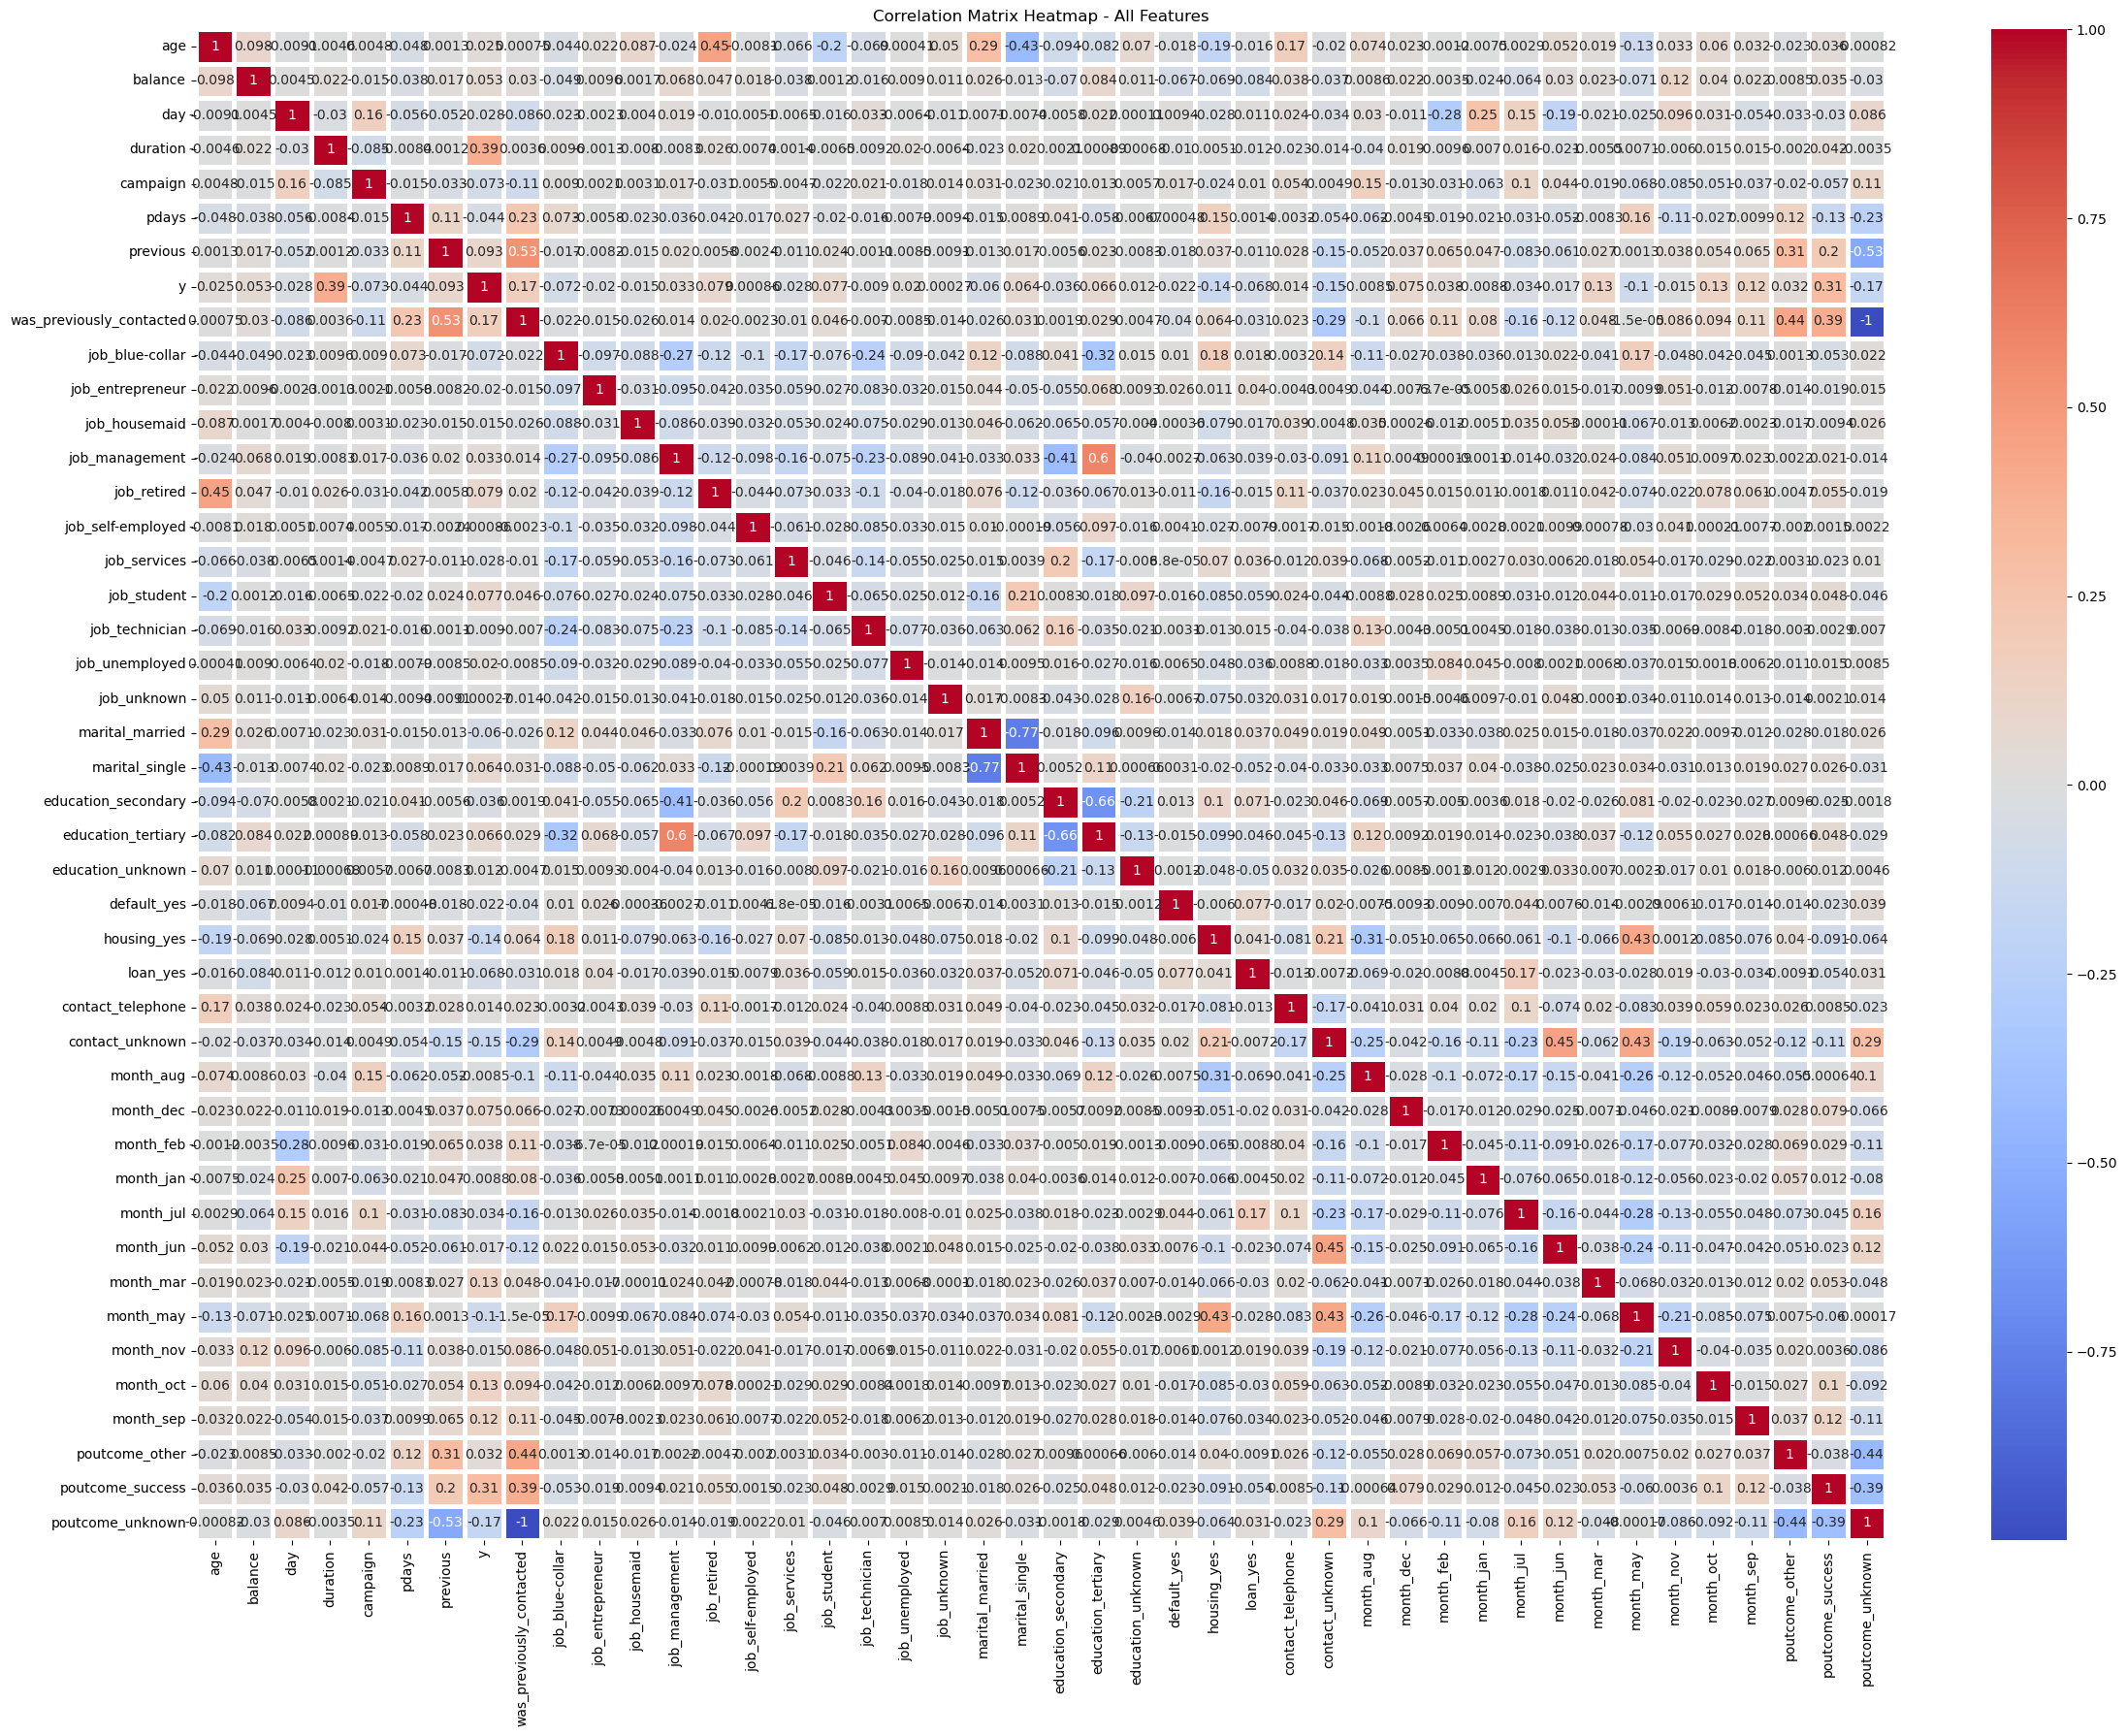

Correlation with Target Variable 'y':

y                           1.000000
duration                    0.394521
poutcome_success            0.306788
was_previously_contacted    0.167263
month_mar                   0.129456
month_oct                   0.128531
month_sep                   0.123185
previous                    0.093236
job_retired                 0.079245
job_student                 0.076897
month_dec                   0.075164
education_tertiary          0.066448
marital_single              0.063526
balance                     0.052838
month_feb                   0.038417
job_management              0.032919
poutcome_other              0.031955
age                         0.025155
job_unemployed              0.020390
contact_telephone           0.014042
education_unknown           0.012053
job_self-employed           0.000855
job_unknown                 0.000267
month_aug                  -0.008536
month_jan                  -0.008783
job_technician             -0.008970

C:\Users\DEV MODI\AppData\Local\Temp\ipykernel_10772\2271472963.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


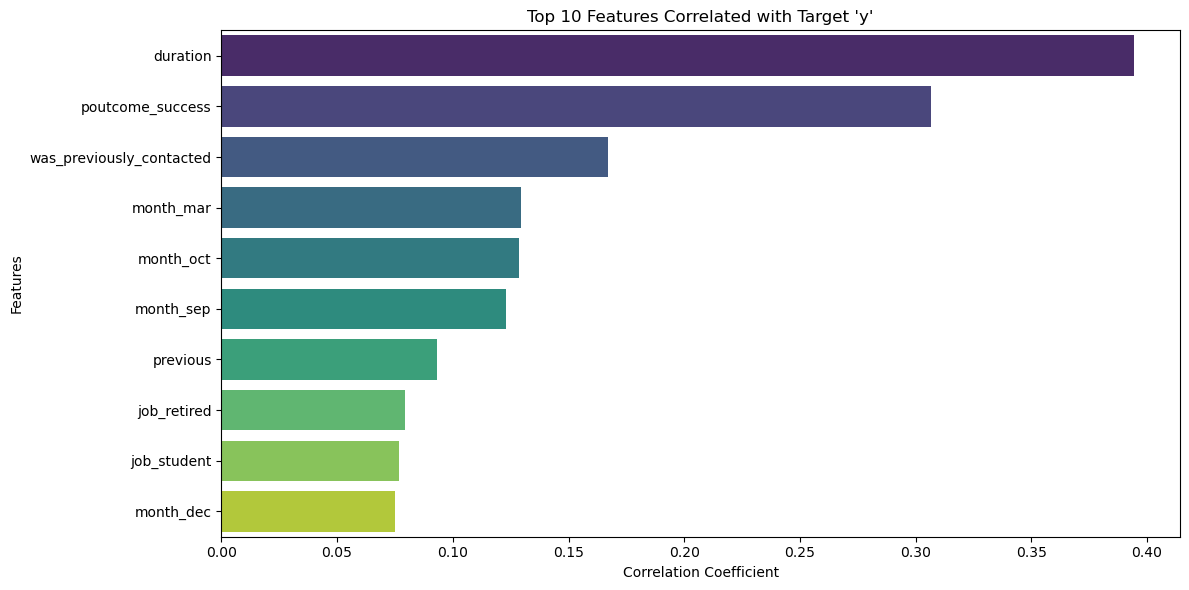

In [33]:
# Correlation Analysis
# Make sure df_caten is ready at this point (already created after pdays etc.)

# 1. Compute correlation matrix
corr_matrix = df_caten.corr()

# 2. Plot heatmap for all correlations
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=2.5)
plt.title('Correlation Matrix Heatmap - All Features')
plt.tight_layout()
plt.show()

# 3. Check correlations with target variable 'y'
target_corr = corr_matrix['y'].sort_values(ascending=False)
print("Correlation with Target Variable 'y':\n")
print(target_corr)

# Optional: Plot top 10 features most correlated with target
top_corr = target_corr.drop('y').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top 10 Features Correlated with Target 'y'")
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [34]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Copy df_caten before scaling
df_model = df_caten.copy()

# Define numerical columns to scale (excluding 'y')
numerical_cols_to_scale = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'y' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('y')

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_model[numerical_cols_to_scale] = scaler.fit_transform(df_model[numerical_cols_to_scale])


In [35]:
# checking it

df_model[numerical_cols_to_scale].head()


,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.110178,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.110178,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.110178,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.110178,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.110178,-0.25194


In [36]:
# checking

df_model[numerical_cols_to_scale].head()


,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.110178,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.110178,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.110178,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.110178,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.110178,-0.25194


In [37]:
# Checking

df_model[numerical_cols_to_scale].describe().T[['mean', 'std']]



,mean,std
age,2.112250e-16,1.000011
balance,1.760208e-17,1.000011
day,1.257292e-17,1.000011
duration,6.035001e-17,1.000011
campaign,3.017500e-17,1.000011
pdays,1.533896e-16,1.000011
previous,4.023334e-17,1.000011


In [38]:
print(numerical_cols_to_scale)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [39]:
print(df_model[numerical_cols_to_scale].head())


        age   balance       day  duration  campaign     pdays  previous
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.110178  -0.25194
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.110178  -0.25194
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.110178  -0.25194
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.110178  -0.25194
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.110178  -0.25194



Logistic Regression
Accuracy: 0.9014707508570164
Confusion Matrix:
 [[7785  200]
 [ 691  367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



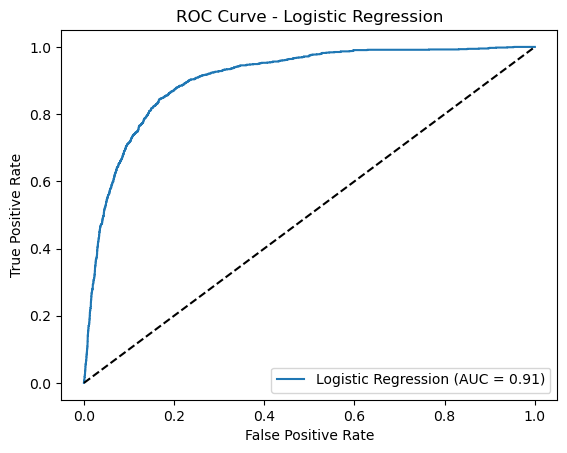


Random Forest
Accuracy: 0.907995134358067
Confusion Matrix:
 [[7772  213]
 [ 619  439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.67      0.41      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043



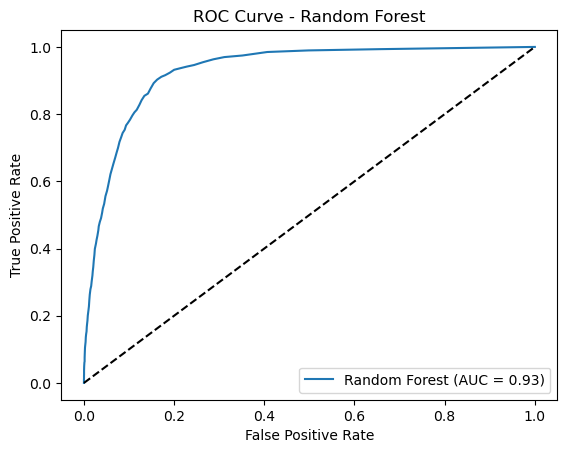


XGBoost


C:\Users\DEV MODI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9087692137564968
Confusion Matrix:
 [[7699  286]
 [ 539  519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.64      0.49      0.56      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



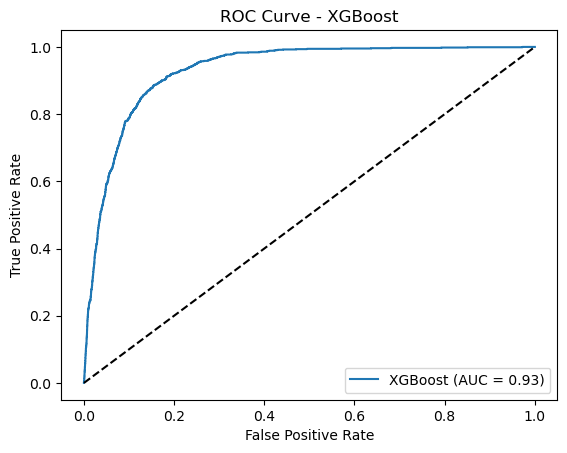

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Separate features and target
X = df_model.drop('y', axis=1)
y = df_model['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Fit and evaluate models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()


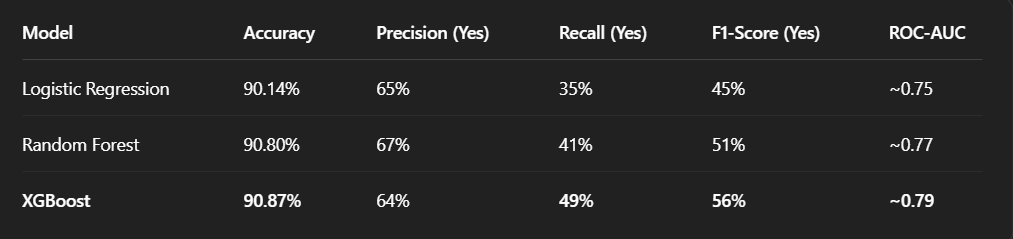

In [41]:
# Task 3

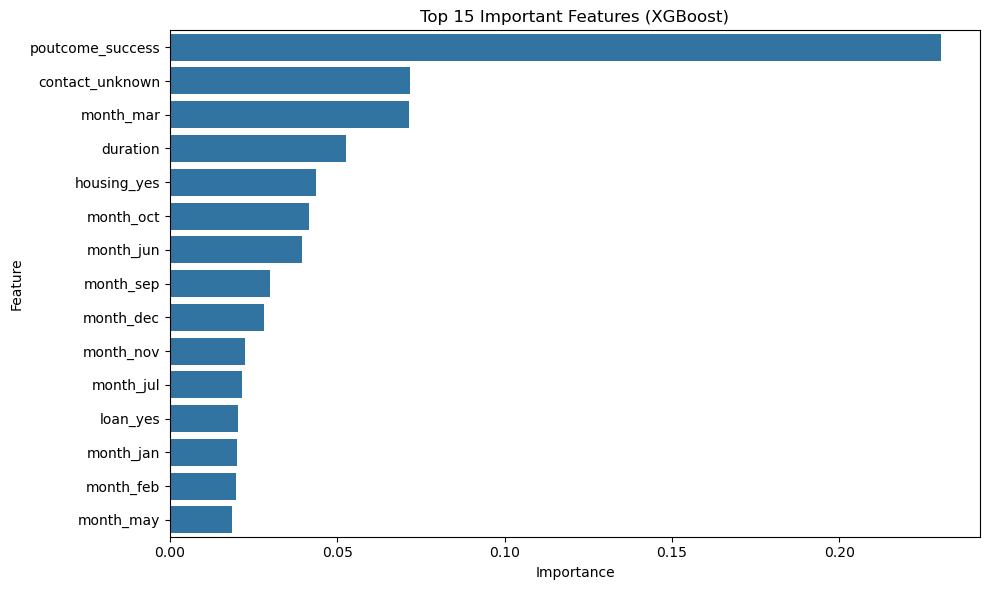

In [42]:
# Extract the trained XGBoost model from the dictionary
xgb_model = models["XGBoost"]

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top 15 Important Features (XGBoost)')
plt.tight_layout()
plt.show()


In [43]:
 Top Insights from Feature Importance

1. **`poutcome_success` (Previous Campaign Outcome = Success)**  
   - **Interpretation**: Customers who were successfully converted in previous campaigns are **highly likely to subscribe again**.  
   - **Actionable Suggestion**: Focus more on re-targeting previously converted customers. Consider offering loyalty benefits or quick follow-ups.

2. **`contact_unknown`**  
   - **Interpretation**: Contacts where the communication type is unknown seem to influence the outcome.
   - **Suggestion**: Ensure that the contact method (cellular or telephone) is clearly defined. Unknown contact types might be unpredictable and should be streamlined.

3. **`month_mar`, `month_oct`, `month_jun`, `month_sep`, etc.**  
   - **Interpretation**: The month of contact plays a significant role. March, October, and June are notably important.
   - **Suggestion**: Schedule marketing campaigns during these months. Analyze why certain months yield higher success—could be seasonal trends or financial cycles.

4. **`duration` (Call Duration)**  
   - **Interpretation**: Longer call durations may indicate customer interest and hence better conversion chances.
   - **Suggestion**: Don’t rush calls. Train agents to be more engaging to extend meaningful conversations.

5. **`housing_yes` and `loan_yes`**  
   - **Interpretation**: Whether a customer has a housing loan or personal loan affects their decision.
   - **Suggestion**: Personalize offers based on financial commitments. For instance, offer savings-oriented plans to customers with ongoing loans.

---

### ✍️ Suggested Write-up for Task 3 (Improving Customer Conversion)

> Based on the feature importance extracted from the XGBoost model, several key insights emerge for optimizing customer conversion strategies:
> 
> - **Re-engage Previously Converted Clients**: Customers with a past successful outcome (`poutcome_success`) show the highest likelihood of subscribing again. Focused follow-ups and tailored offers for this segment can yield strong results.
> 
> - **Timing Matters**: Months like March, October, and June stand out as optimal periods for campaign effectiveness. Planning promotions around these months can improve engagement.
> 
> - **Call Quality Over Quantity**: The duration of a call (`duration`) positively impacts subscription likelihood. Training staff to maintain longer, value-driven conversations could significantly enhance outcomes.
> 
> - **Customer Profiling**: Financial factors like housing and personal loans influence decision-making. Using this information to tailor messaging (e.g., emphasizing financial security or savings) can lead to better results.
> 
> - **Refine Contact Strategy**: Ensuring clarity in contact methods (avoiding `contact_unknown`) will help in targeting the right communication channels effectively.



SyntaxError: unterminated string literal (detected at line 1) (333766101.py, line 1)